In [1]:
import mlflow
from mlflow.tracking.client import MlflowClient

from rich import print
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import ray
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
from ddistexps.utils import format_vertical_headers

sns.set_theme(style="whitegrid")  
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

[2024-05-06 16:52:42,585] [INFO] [real_accelerator.py:191:get_accelerator] Setting ds_accelerator to cuda (auto detect)


# Pareto-optimal Frontier


(From wiki): 
The Pareto frontier, $P(Y)$, is formally described as follows. Consider a system with function $f: X \rightarrow \mathbb{R}^m$, where $X$ is a compact set of feasible decisions in the metric space $\mathbb{R}^n$, and $Y$ is the feasible set of criterion vectors in $\mathbb{R}^m$, such that $Y=\left\{y \in \mathbb{R}^m: y=f(x), x \in X\right\}$.

We assume that the preferred directions of criteria values are known (min or max). A point $y^{\prime \prime} \in \mathbb{R}^m$ is preferred to (strictly dominates) another point $y^{\prime} \in \mathbb{R}^m$, written as $y^{\prime \prime} \succ y^{\prime}$. The Pareto frontier is thus written as:
$$
P(Y)=\left\{y^{\prime} \in Y:\left\{y^{\prime \prime} \in Y: y^{\prime \prime} \succ y^{\prime}, y^{\prime} \neq y^{\prime \prime}\right\}=\emptyset\right\} .
$$

A significant aspect of the Pareto frontier in economics is that, at a Pareto-efficient allocation, the marginal rate of substitution is the same for all consumers.


**Total Floating Point Operations vs Accuracy**

*Datasets*

- Image: `CIFAR10`, `CIFAR100`, `ImageNet`, `TinyImageNet`, 
- Language: 
- Speech: `GoogleSpeech`

In [2]:
# Define the relevant experiments here; Dataset -> [Experiment names]
EXPERIMENTS = {
    'CIFAR10': ['baseline/cifar10-small', 'baseline/cifar10-large', 'distillation/cifar10-small'],
    #'CIFAR100': ['baseline/cifar100-small', 'baseline/cifar100-large', 'distillation/cifar100-small'],
    'ImageNet1k': ['baseline/imagenet-small', 'baseline/imagenet-sanity', 'baseline/imagenet-small'],
    'TinyImageNet': [],
}

In [3]:
from ccutils.utils import get_all_runs, get_pareto_frontier
from ccutils.plot import plot_pareto_curve

num-runs: 271
metrics.val_acc_best      0
metrics.artifact_flops    0
dtype: int64


num-runs: 154
metrics.val_acc_best      5
metrics.artifact_flops    0
dtype: int64


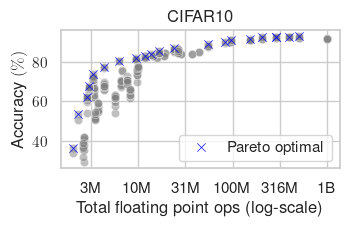

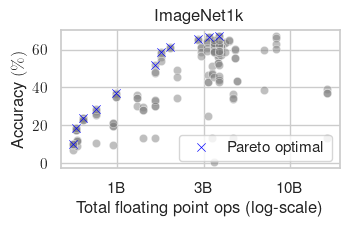

In [7]:
all_ds_names = ['CIFAR10', "ImageNet1k"]

for ds_name in all_ds_names:
    expnames = EXPERIMENTS[ds_name]
    all_runs = get_all_runs(expnames)
    fig, ax = plot_pareto_curve(ds_name, all_runs, figsize=(3.6, 1.8))
    fig.savefig(f'../imgs/pareto-set-{ds_name}.pdf', bbox_inches='tight')